## 環境整備、関数定義

In [72]:
# scipy.sparse.csr_matrix
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.integrate import solve_ivp
import importlib
from scipy.optimize import curve_fit

import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

import differential, equation, animation
importlib.reload(differential)
from differential import make_differential_ops
importlib.reload(equation)
from equation import *
importlib.reload(animation)
from animation import *

In [37]:
def main(name:str="kdv_solve_ivp"):
    # Load results
    npz = np.load(f"../out/{name}.npz")
    print("npz.files =", npz.files)

    x = npz['x']
    t = npz['t']
    u_tx = npz['u_tx']
    print("x.shape =", x.shape)
    print("t.shape =", t.shape)
    print("u_tx.shape =", u_tx.shape)

    # make an animation
    print("Making animation...")
    make_animation(
        x, t, u_tx, ymin=-1.5, ymax=3.0, 
        filename=f"../out/{name}.gif"
        )

## $\lambda$の変化

補足：与えられる解について  
x.shape = (100, )  
t.shape = (101, )  
u_tx.shape(101, 100) -> u_tx[time, position]  

### テスト

In [34]:
solve_soliton(soliton, [3, 5], save_name="npz/lambda_5")
solve_soliton(soliton, [3, 7], save_name="npz/lambda_7")
solve_soliton(soliton, [3, 9], save_name="npz/lambda_9")

dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 44406
 Minimum time step    : 0.00013731122879079294
 Maximum time step    : 0.00026768816519399247
dt = 0.05
shape of u(t, x) : (101, 100)
dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 44222
 Minimum time step    : 3.454422873083729e-05
 Maximum time step    : 0.0003205616040076715
dt = 0.05
shape of u(t, x) : (101, 100)
dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 44210
 Minimum time step    : 0.00016137714572117545
 Maximum time step    : 0.0003773645946958188
dt = 0.05
shape of u(t, x) : (101, 100)


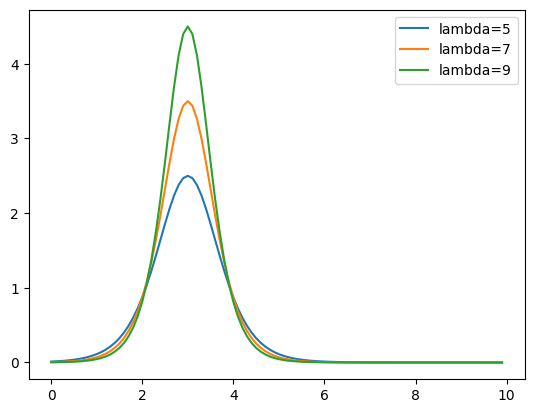

In [40]:
view_solit_t0("../out/npz/lambda_5.npz")
view_solit_t0("../out/npz/lambda_7.npz")
view_solit_t0("../out/npz/lambda_9.npz")
plt.legend()

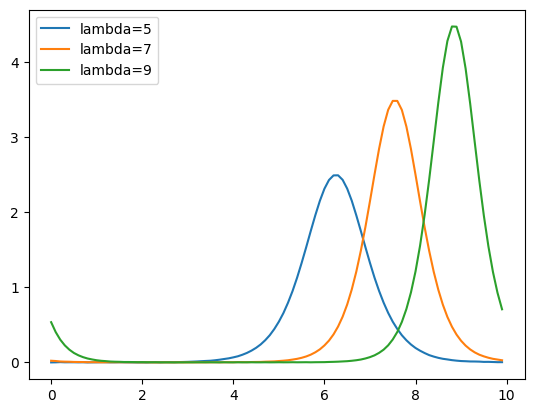

In [44]:
view_solit_t065("../out/npz/lambda_5.npz")
view_solit_t065("../out/npz/lambda_7.npz")
view_solit_t065("../out/npz/lambda_9.npz")
plt.legend()

### $\lambda=0. \sim 10.$で、速度$\partial_t u(t,x)$を調べる

In [197]:
np_lam = np.array([8., 9., 10., 11., 13., 15., 18., 22., 28., 40., 60.])
for i in np_lam:
    solve_soliton(soliton, [2, i], save_name=f"npz/lambda_{i}")

dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 46884
 Minimum time step    : 0.00015189393053205436
 Maximum time step    : 0.0002235388382860748
dt = 0.05
shape of u(t, x) : (101, 100)
dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 46041
 Minimum time step    : 0.00014070861849901917
 Maximum time step    : 0.00022350141307114768
dt = 0.05
shape of u(t, x) : (101, 100)
dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 45451
 Minimum time step    : 1.8327732203005098e-05
 Maximum time step    : 0.0002244827709776409
dt = 0.05
shape of u(t, x) : (101, 100)
dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 45047
 Minimum time step    : 1.0555422907287948e-05
 Maximum time step    : 0.0002308676365820258

In [41]:
nx = 100
x_max = 10.0
x = np.linspace(0, x_max, nx, endpoint=False)
dx = x[1] - x[0]

nt = 101
t_max = 5
t = np.linspace(0, t_max, nt)

dev_op1 = make_differential_ops(1, 4, nx, dx).toarray()
dev_op3 = make_differential_ops(3, 4, nx, dx).toarray()

np_lam = np.array([8., 9., 10., 11., 13., 15., 18., 22., 28., 40.])

In [99]:
a = np.arange(3)
b = a.copy()[:, np.newaxis]
(a*b).max(axis=0)

array([0, 2, 4])

[ -1.88673144 -38.34718822   0.11135881 103.70534743 103.64499354] [1.08029718e+05 2.19566869e+06 7.07033842e-02 1.72943158e+03
 1.72840968e+03]


/tmp/ipykernel_571/3436195506.py:3: RuntimeWarning: overflow encountered in exp
  v = lam**(5/2) * A * np.exp(a * topology) + np.exp(-b * topology)


Text(0, 0.5, '振幅')

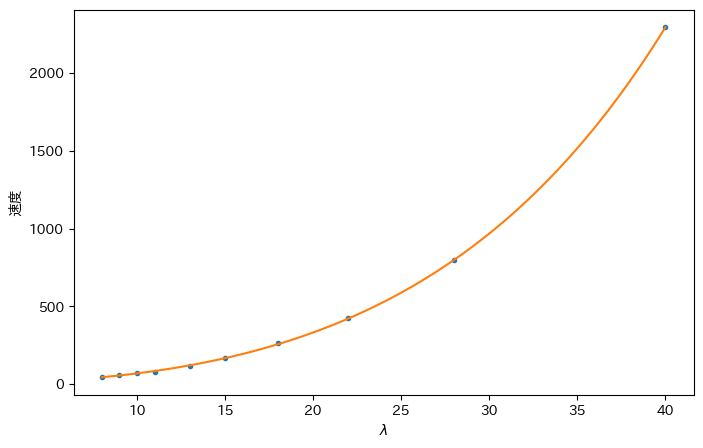

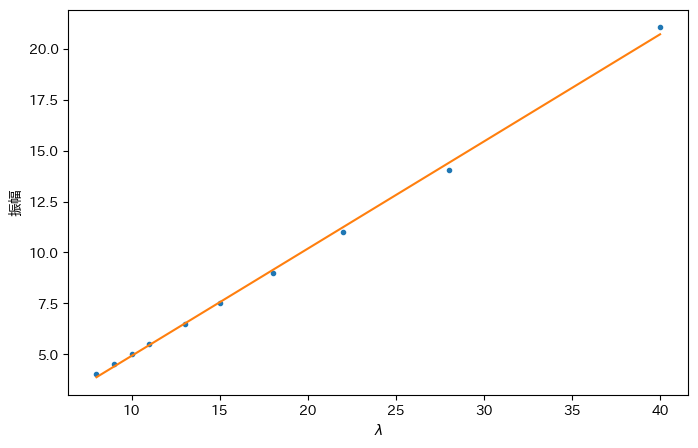

In [111]:
def velocity(lam, a, b, A, x=2., x0=5):
    topology = np.sqrt(lam) * (x - x0) / 2
    v = lam**(5/2) * A * np.exp(a * topology) + np.exp(-b * topology)
    return v 

def scale(lam, a, b):
    return a * lam + b

def view_vt(path:str):
    npz = np.load(path)
    x = npz['x']
    t = npz['t']
    ut = npz['u_tx']

    u_x = dev_op1 @ ut.T
    u_xxx = dev_op3 @ ut.T
    dudt = (-6. * ut.T * u_x - u_xxx).T
    vt = dudt[:, x == 2.]
    # plt.plot(t, vt.flatten(), '--.')
    return vt.max(), ut.max()

vt_maxes = np.zeros_like(np_lam)
amp_maxes = np.zeros_like(np_lam)
for i, name in enumerate(np_lam):
    path = f"../out/npz/lambda_{name}.npz"
    max_vt, max_amp = view_vt(path)
    vt_maxes[i] = max_vt
    amp_maxes[i] = max_amp

popt, pcov = curve_fit(velocity, np_lam, vt_maxes)
x = np.linspace(np_lam.min(), np_lam.max(), 100)
print(popt, np.sqrt(np.diag(pcov)))
plt.figure(figsize=(8, 5))
plt.plot(np_lam, vt_maxes, '.')
plt.plot(x, velocity(x, *popt))
plt.ylabel("速度")
plt.xlabel(r"$\lambda$")
plt.figure(figsize=(8, 5))
popt, pcov = curve_fit(scale, np_lam, amp_maxes)
x = np.linspace(np_lam.min(), np_lam.max(), 100)
plt.plot(np_lam, amp_maxes, '.')
plt.plot(x, scale(x, *popt))
plt.xlabel(r"$\lambda$")
plt.ylabel("振幅")

## $x_0$の変化

In [78]:
solve_soliton(soliton, [2., 5], save_name="npz/x0_2")
solve_soliton(soliton, [4, 5], save_name="npz/x0_4")
solve_soliton(soliton, [6, 5], save_name="npz/x0_6")
solve_soliton(soliton, [10, 5], save_name="npz/x0_10")
solve_soliton(soliton, [20, 5], save_name="npz/x0_20")

dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 51939
 Minimum time step    : 0.00011165130737644802
 Maximum time step    : 0.00021565622203034707
dt = 0.05
shape of u(t, x) : (101, 100)
dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 44236
 Minimum time step    : 0.0001297799359871732
 Maximum time step    : 0.00041620167800017374
dt = 0.05
shape of u(t, x) : (101, 100)
dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 44225
 Minimum time step    : 9.58250089801993e-05
 Maximum time step    : 0.00039805669367410864
dt = 0.05
shape of u(t, x) : (101, 100)
dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 108392
 Minimum time step    : 8.087939718492976e-05
 Maximum time step    : 9.52351062668555e-05
d

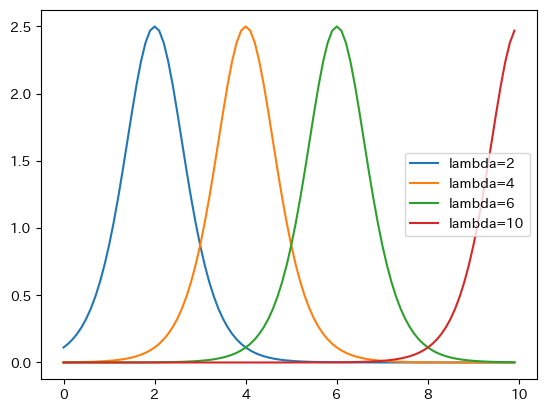

In [88]:
view_solit_t0("../out/npz/x0_2.npz")
view_solit_t0("../out/npz/x0_4.npz")
view_solit_t0("../out/npz/x0_6.npz")
view_solit_t0("../out/npz/x0_10.npz")
plt.legend()

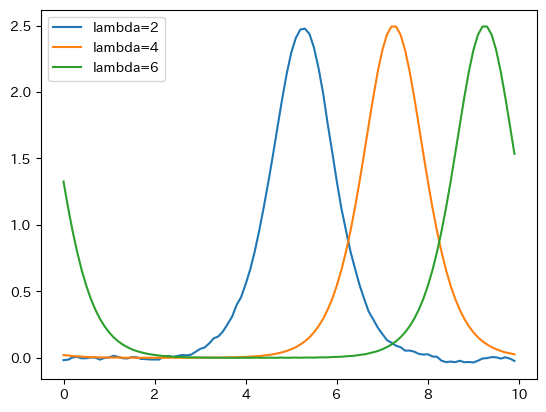

In [90]:
view_solit_t065("../out/npz/x0_2.npz")
view_solit_t065("../out/npz/x0_4.npz")
view_solit_t065("../out/npz/x0_6.npz")
plt.legend()